# Thompson Sampling

Now we will implment a new reinforcement learning (RL) algorithm: Thomspon Sampling (TS). We will also see whether this TS algo can beat the UC algo, meaning, if we can catch the best ad in <= 500 rounds or not.

We will work on the same dataset: "Ads_CTR_Optimisation" having 10000 users in the rows and 10 ads in the columns.

All the codes will be same as that of UCB algorithm, except for the implementation part.

## Importing the libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [43]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing Thompson Sampling

In [44]:
import random   # We import random library as we have to take random draws from the Beta distribution. Remember that in UCB algo, we imported math library.
N = 10000   # total no. of rounds or users to whom we show successively the ads.
d = 10   # no. of ads among which we want to find the best one with the highest conversion rate.

ads_selected = []   # list of all ads that will be selected over the rounds.

# Here the Thompson Sampling algorithm starts actually (differ from UCB algorithm):
numbers_of_rewards_1 = [0] * d   # List of reward-1 for d ads. Initilized to zeros. Over the rounds, the elements of this list will be populated as soon as an ad receive a reward-1, in which case we increment the element corresponding to the ad by 1.
numbers_of_rewards_0 = [0] * d   # List of reward-0 for d ads. Initilized to zeros. Over the rounds, the elements of this list will be populated as soon as an ad receive a reward-0, in which case we increment the element corresponding to the ad by 1.

total_reward = 0   # This variable will show the accumulated reward over the round. Inilized to zero.

for n in range(0, N):   # this for loop iterates through all the N = 10000 rounds. In case of website ads, this is also the total numbet of users.
  ad = 0   # this variable will be the index of the ad that an user select at round n. Inilized to 0 as the for loop of i will iterate through all the ad indices from 0 to 9.
  max_random = 0   # Like in the UCB algorithm we had to consider "max_upper_confidence_bound" variable, here we have to take the maximum value of the beta distribution.

  for i in range(0, d):   # this for loop iterates through all the d ads having index 0 to (d-1), for a particular row index or round n.
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)   # Taking a random value from the beta distribution. The betavariate() funcion from random library gives a random draw from the beta distribution. The two arguments of the betavariate() function are for the ad i.

    if (random_beta > max_random):   # In this if block, we compare the above random value with the max_random value. We update max_random to the random_beta if random_beta > max_random. So, over the for loop of i or ads, max_random will be updated each time we get a random_beta higher than the previour random_beta. This is similar to the UCB algo where we were updating the max_ucb value. If the new random_draw of the new ad is not larger than max_random, we will just keep the previous ad and the previous max_random.
      max_random = random_beta
      ad = i   # At the same time we update the ad index whose random_beta > max_random.
    # At the end of this if block, we get the maximum value of the random_draw and the ad index (among all 0-9 indices) which gave this maximum random_draw.

  # Now we update the 4 initial variables.
  ads_selected.append(ad)   # So, for each round n, we select the ad index that has the maximum random_beta value, append in this list. We will have such N = 10000 ad indices.

  # An ad that is selected via maximum random_beta may have reward either 0 or 1. It is NOT that a selected ad has always reward 1. If the selected ad has reward 1, numbers_of_rewards_1 list is incremented by 1 for the selected ad. If the reward is 0, numbers_of_rewards_0 is incremented by 1 for the selected ad.

  reward = dataset.values[n, ad]   # "reward" varible is the value in the dataset corresponding to the row we are currently dealing with or the customer and the column of the ad that is just selected above. So, reward comes from the dataset. It can be 0 or 1 for the selected ad.

  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  total_reward = total_reward + reward   # here we collect the total accumulated reward or cumulative reward over the rounds.


In [45]:
ads_selected[:20]

# The ads_selected list contains the ad indices that was selected in each round.

[6, 2, 4, 3, 1, 0, 3, 9, 7, 0, 0, 8, 0, 5, 4, 0, 8, 2, 4, 3]

In [46]:
len(ads_selected)

10000

## Visualising the results - Histogram

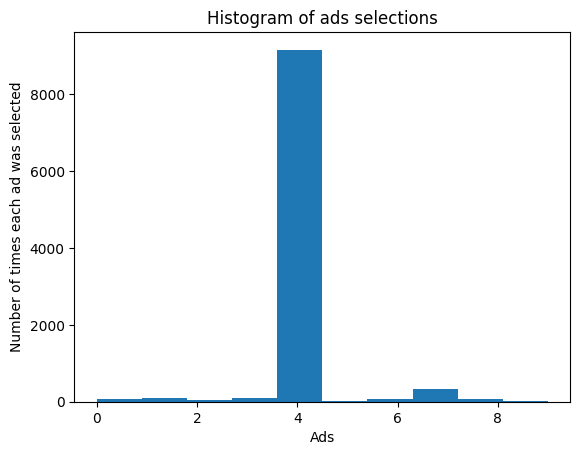

In [47]:
# Plot
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()


We see that the TS algorithm is able to identify ad index-4 as the highest CTR ad with $N = 10000$ rounds. Also, TS algo gives better result than UCB algo in the sense that ad index-4 kind of suppresses (in terms of heights of the bars of the histogram plot) other ads almost completely which was not the case with UCB algo in which we saw finite heights of the bars of the other ads also in the histogram plot.

## Vary number of rounds $N$

We saw that UCB algorithm was able to identify the ad index-4 as the highest CTR ad with $N = 1000$, but NOT able to identify it with $N = 500$.

So, now we will see if the Thompson sampling algorithm can beat the UCB algorithm i.e., can identify the ad index-4 as the highest CTR ad with smaller value of $N$ than that in UCB algorithm i.e., with $N = 500$ rounds.

### $N = 1000$

In [48]:
# N = 1000

import random   # We import random library as we have to take random draws from the Beta distribution. Remember that in UCB algo, we imported math library.
N = 1000   # total no. of rounds or users to whom we show successively the ads.
d = 10   # no. of ads among which we want to find the best one with the highest conversion rate.

ads_selected = []   # list of all ads that will be selected over the rounds.

# Here the Thompson Sampling algorithm starts actually (differ from UCB algorithm):
numbers_of_rewards_1 = [0] * d   # List of reward-1 for d ads. Initilized to zeros. Over the rounds, the elements of this list will be populated as soon as an ad receive a reward-1, in which case we increment the element corresponding to the ad by 1.
numbers_of_rewards_0 = [0] * d   # List of reward-0 for d ads. Initilized to zeros. Over the rounds, the elements of this list will be populated as soon as an ad receive a reward-0, in which case we increment the element corresponding to the ad by 1.

total_reward = 0   # This variable will show the accumulated reward over the round. Inilized to zero.

for n in range(0, N):   # this for loop iterates through all the N = 10000 rounds. In case of website ads, this is also the total numbet of users.
  ad = 0   # this variable will be the index of the ad that an user select at round n. Inilized to 0 as the for loop of i will iterate through all the ad indices from 0 to 9.
  max_random = 0   # Like in the UCB algorithm we had to consider "max_upper_confidence_bound" variable, here we have to take the maximum value of the beta distribution.

  for i in range(0, d):   # this for loop iterates through all the d ads having index 0 to (d-1), for a particular row index or round n.
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)   # Taking a random value from the beta distribution. The betavariate() funcion from random library gives a random draw from the beta distribution. The two arguments of the betavariate() function are for the ad i.

    if (random_beta > max_random):   # In this if block, we compare the above random value with the max_random value. We update max_random to the random_beta if random_beta > max_random. So, over the for loop of i or ads, max_random will be updated each time we get a random_beta higher than the previour random_beta. This is similar to the UCB algo where we were updating the max_ucb value. If the new random_draw of the new ad is not larger than max_random, we will just keep the previous ad and the previous max_random.
      max_random = random_beta
      ad = i   # At the same time we update the ad index whose random_beta > max_random.
    # At the end of this if block, we get the maximum value of the random_draw and the ad index (among all 0-9 indices) which gave this maximum random_draw.

  # Now we update the 4 initial variables.
  ads_selected.append(ad)   # So, for each round n, we select the ad index that has the maximum random_beta value, append in this list. We will have such N = 10000 ad indices.

  # An ad that is selected via maximum random_beta may have reward either 0 or 1. It is NOT that a selected ad has always reward 1. If the selected ad has reward 1, numbers_of_rewards_1 list is incremented by 1 for the selected ad. If the reward is 0, numbers_of_rewards_0 is incremented by 1 for the selected ad.

  reward = dataset.values[n, ad]   # "reward" varible is the value in the dataset corresponding to the row we are currently dealing with or the customer and the column of the ad that is just selected above. So, reward comes from the dataset. It can be 0 or 1 for the selected ad.

  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  total_reward = total_reward + reward   # here we collect the total accumulated reward or cumulative reward over the rounds.


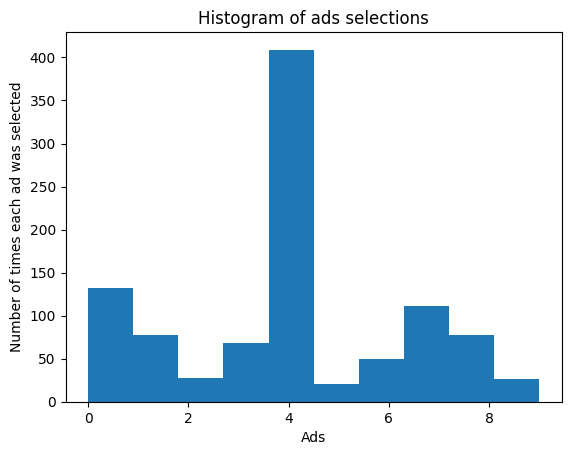

In [49]:
# Plot
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()


Wow! The TS algorithm is able to identify the ad index-4 as the highest CTR ad even with $N = 1000$ rounds.

### $N = 500$

In [50]:
# N = 500

import random   # We import random library as we have to take random draws from the Beta distribution. Remember that in UCB algo, we imported math library.
N = 500   # total no. of rounds or users to whom we show successively the ads.
d = 10   # no. of ads among which we want to find the best one with the highest conversion rate.

ads_selected = []   # list of all ads that will be selected over the rounds.

# Here the Thompson Sampling algorithm starts actually (differ from UCB algorithm):
numbers_of_rewards_1 = [0] * d   # List of reward-1 for d ads. Initilized to zeros. Over the rounds, the elements of this list will be populated as soon as an ad receive a reward-1, in which case we increment the element corresponding to the ad by 1.
numbers_of_rewards_0 = [0] * d   # List of reward-0 for d ads. Initilized to zeros. Over the rounds, the elements of this list will be populated as soon as an ad receive a reward-0, in which case we increment the element corresponding to the ad by 1.

total_reward = 0   # This variable will show the accumulated reward over the round. Inilized to zero.

for n in range(0, N):   # this for loop iterates through all the N = 10000 rounds. In case of website ads, this is also the total numbet of users.
  ad = 0   # this variable will be the index of the ad that an user select at round n. Inilized to 0 as the for loop of i will iterate through all the ad indices from 0 to 9.
  max_random = 0   # Like in the UCB algorithm we had to consider "max_upper_confidence_bound" variable, here we have to take the maximum value of the beta distribution.

  for i in range(0, d):   # this for loop iterates through all the d ads having index 0 to (d-1), for a particular row index or round n.
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)   # Taking a random value from the beta distribution. The betavariate() funcion from random library gives a random draw from the beta distribution. The two arguments of the betavariate() function are for the ad i.

    if (random_beta > max_random):   # In this if block, we compare the above random value with the max_random value. We update max_random to the random_beta if random_beta > max_random. So, over the for loop of i or ads, max_random will be updated each time we get a random_beta higher than the previour random_beta. This is similar to the UCB algo where we were updating the max_ucb value. If the new random_draw of the new ad is not larger than max_random, we will just keep the previous ad and the previous max_random.
      max_random = random_beta
      ad = i   # At the same time we update the ad index whose random_beta > max_random.
    # At the end of this if block, we get the maximum value of the random_draw and the ad index (among all 0-9 indices) which gave this maximum random_draw.

  # Now we update the 4 initial variables.
  ads_selected.append(ad)   # So, for each round n, we select the ad index that has the maximum random_beta value, append in this list. We will have such N = 10000 ad indices.

  # An ad that is selected via maximum random_beta may have reward either 0 or 1. It is NOT that a selected ad has always reward 1. If the selected ad has reward 1, numbers_of_rewards_1 list is incremented by 1 for the selected ad. If the reward is 0, numbers_of_rewards_0 is incremented by 1 for the selected ad.

  reward = dataset.values[n, ad]   # "reward" varible is the value in the dataset corresponding to the row we are currently dealing with or the customer and the column of the ad that is just selected above. So, reward comes from the dataset. It can be 0 or 1 for the selected ad.

  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  total_reward = total_reward + reward   # here we collect the total accumulated reward or cumulative reward over the rounds.


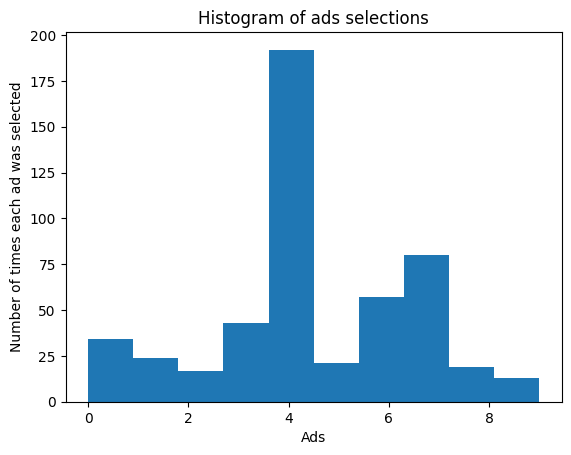

In [51]:
# Plot
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()


Fantastic!! The TS algorithm is able to identify ad index-4 as the best ad even with as little as $N = 500$ rounds! TS algorithm is able to identify the best ad quciker than UCB algorithm. So, **TS algorithm beats the UCB algorithm**.  

It is seen that, **TS algorithm is more powerful than UCB algorithm in most situations**.

### $N = 250$

In [52]:
# N = 250

import random   # We import random library as we have to take random draws from the Beta distribution. Remember that in UCB algo, we imported math library.
N = 250   # total no. of rounds or users to whom we show successively the ads.
d = 10   # no. of ads among which we want to find the best one with the highest conversion rate.

ads_selected = []   # list of all ads that will be selected over the rounds.

# Here the Thompson Sampling algorithm starts actually (differ from UCB algorithm):
numbers_of_rewards_1 = [0] * d   # List of reward-1 for d ads. Initilized to zeros. Over the rounds, the elements of this list will be populated as soon as an ad receive a reward-1, in which case we increment the element corresponding to the ad by 1.
numbers_of_rewards_0 = [0] * d   # List of reward-0 for d ads. Initilized to zeros. Over the rounds, the elements of this list will be populated as soon as an ad receive a reward-0, in which case we increment the element corresponding to the ad by 1.

total_reward = 0   # This variable will show the accumulated reward over the round. Inilized to zero.

for n in range(0, N):   # this for loop iterates through all the N = 10000 rounds. In case of website ads, this is also the total numbet of users.
  ad = 0   # this variable will be the index of the ad that an user select at round n. Inilized to 0 as the for loop of i will iterate through all the ad indices from 0 to 9.
  max_random = 0   # Like in the UCB algorithm we had to consider "max_upper_confidence_bound" variable, here we have to take the maximum value of the beta distribution.

  for i in range(0, d):   # this for loop iterates through all the d ads having index 0 to (d-1), for a particular row index or round n.
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)   # Taking a random value from the beta distribution. The betavariate() funcion from random library gives a random draw from the beta distribution. The two arguments of the betavariate() function are for the ad i.

    if (random_beta > max_random):   # In this if block, we compare the above random value with the max_random value. We update max_random to the random_beta if random_beta > max_random. So, over the for loop of i or ads, max_random will be updated each time we get a random_beta higher than the previour random_beta. This is similar to the UCB algo where we were updating the max_ucb value. If the new random_draw of the new ad is not larger than max_random, we will just keep the previous ad and the previous max_random.
      max_random = random_beta
      ad = i   # At the same time we update the ad index whose random_beta > max_random.
    # At the end of this if block, we get the maximum value of the random_draw and the ad index (among all 0-9 indices) which gave this maximum random_draw.

  # Now we update the 4 initial variables.
  ads_selected.append(ad)   # So, for each round n, we select the ad index that has the maximum random_beta value, append in this list. We will have such N = 10000 ad indices.

  # An ad that is selected via maximum random_beta may have reward either 0 or 1. It is NOT that a selected ad has always reward 1. If the selected ad has reward 1, numbers_of_rewards_1 list is incremented by 1 for the selected ad. If the reward is 0, numbers_of_rewards_0 is incremented by 1 for the selected ad.

  reward = dataset.values[n, ad]   # "reward" varible is the value in the dataset corresponding to the row we are currently dealing with or the customer and the column of the ad that is just selected above. So, reward comes from the dataset. It can be 0 or 1 for the selected ad.

  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  total_reward = total_reward + reward   # here we collect the total accumulated reward or cumulative reward over the rounds.


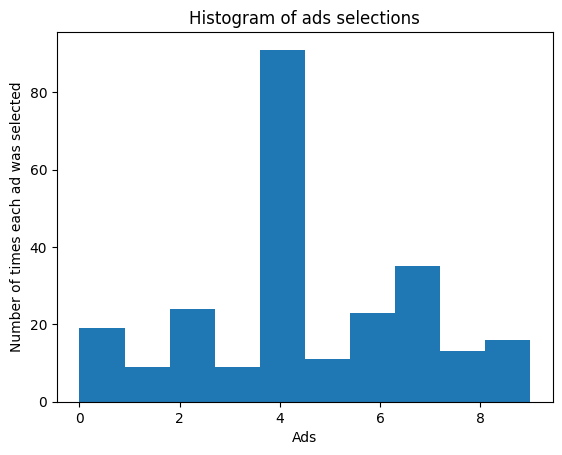

In [53]:
# Plot
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()


TS algorithm can able identify the best ad even with as small as $N = 250$ rounds!!

### $N = 100$

In [63]:
# N = 100

import random   # We import random library as we have to take random draws from the Beta distribution. Remember that in UCB algo, we imported math library.
N = 100   # total no. of rounds or users to whom we show successively the ads.
d = 10   # no. of ads among which we want to find the best one with the highest conversion rate.

ads_selected = []   # list of all ads that will be selected over the rounds.

# Here the Thompson Sampling algorithm starts actually (differ from UCB algorithm):
numbers_of_rewards_1 = [0] * d   # List of reward-1 for d ads. Initilized to zeros. Over the rounds, the elements of this list will be populated as soon as an ad receive a reward-1, in which case we increment the element corresponding to the ad by 1.
numbers_of_rewards_0 = [0] * d   # List of reward-0 for d ads. Initilized to zeros. Over the rounds, the elements of this list will be populated as soon as an ad receive a reward-0, in which case we increment the element corresponding to the ad by 1.

total_reward = 0   # This variable will show the accumulated reward over the round. Inilized to zero.

for n in range(0, N):   # this for loop iterates through all the N = 10000 rounds. In case of website ads, this is also the total numbet of users.
  ad = 0   # this variable will be the index of the ad that an user select at round n. Inilized to 0 as the for loop of i will iterate through all the ad indices from 0 to 9.
  max_random = 0   # Like in the UCB algorithm we had to consider "max_upper_confidence_bound" variable, here we have to take the maximum value of the beta distribution.

  for i in range(0, d):   # this for loop iterates through all the d ads having index 0 to (d-1), for a particular row index or round n.
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)   # Taking a random value from the beta distribution. The betavariate() funcion from random library gives a random draw from the beta distribution. The two arguments of the betavariate() function are for the ad i.

    if (random_beta > max_random):   # In this if block, we compare the above random value with the max_random value. We update max_random to the random_beta if random_beta > max_random. So, over the for loop of i or ads, max_random will be updated each time we get a random_beta higher than the previour random_beta. This is similar to the UCB algo where we were updating the max_ucb value. If the new random_draw of the new ad is not larger than max_random, we will just keep the previous ad and the previous max_random.
      max_random = random_beta
      ad = i   # At the same time we update the ad index whose random_beta > max_random.
    # At the end of this if block, we get the maximum value of the random_draw and the ad index (among all 0-9 indices) which gave this maximum random_draw.

  # Now we update the 4 initial variables.
  ads_selected.append(ad)   # So, for each round n, we select the ad index that has the maximum random_beta value, append in this list. We will have such N = 10000 ad indices.

  # An ad that is selected via maximum random_beta may have reward either 0 or 1. It is NOT that a selected ad has always reward 1. If the selected ad has reward 1, numbers_of_rewards_1 list is incremented by 1 for the selected ad. If the reward is 0, numbers_of_rewards_0 is incremented by 1 for the selected ad.

  reward = dataset.values[n, ad]   # "reward" varible is the value in the dataset corresponding to the row we are currently dealing with or the customer and the column of the ad that is just selected above. So, reward comes from the dataset. It can be 0 or 1 for the selected ad.

  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  total_reward = total_reward + reward   # here we collect the total accumulated reward or cumulative reward over the rounds.


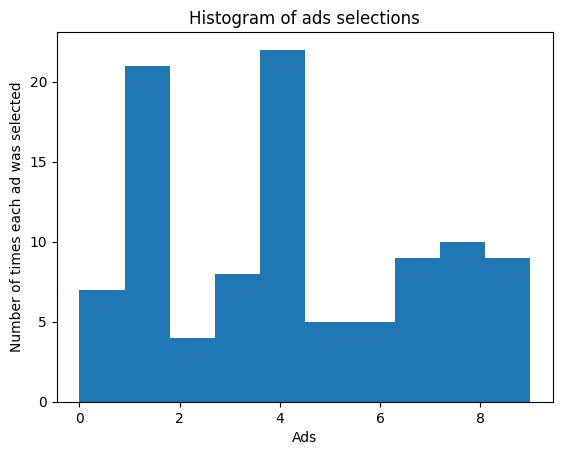

In [64]:
# Plot
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()


But with $N = 100$, it is difficult for TS algorithm to tell the best conversion rate ad.

So, $N = 250$ or $N = 500$ rounds are enough for TS algorithm, while for UCB algorithm minimum $N = 1000$ rounds are needed to tell the best ad.